<a href="https://colab.research.google.com/github/safaabuzaid/xai-brain-tumor-classification/blob/main/01_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os, json
from collections import Counter
import torch
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader


In [2]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip -q '/content/drive/MyDrive/Data/archive.zip' -d '/content/drive/MyDrive/Data/MRI_data/'

In [3]:
training_dir = "/content/drive/MyDrive/Data/MRI_data/Training"
testing_dir = "/content/drive/MyDrive/Data/MRI_data/Testing"

transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert("RGB")),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

In [4]:
training_dataset = datasets.ImageFolder(root = training_dir, transform = transform)
testing_dataset = datasets.ImageFolder(root = testing_dir, transform = transform)

### Data Exploration

In [5]:
print ("Classes = ", training_dataset.classes)
print ("Number of classes = ", len(training_dataset.classes))
print ("Total Number of images = ", len(training_dataset)+len(testing_dataset),
       ", Training = ", len(training_dataset), ", Testing = ", len(testing_dataset), sep=" ")

Classes =  ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes =  4
Total Number of images =  7023 , Training =  5712 , Testing =  1311


### Print numbers of images per class

In [6]:
train_count = Counter(label for path, label in training_dataset.samples)
test_count = Counter(label for path, label in testing_dataset.samples)

#print it nicely
print ("Training images per class:")
for index, count in train_count.items():
  print (f"{training_dataset.classes[index]}: {count}")

print ("\nTesting images per class:")
for index, count in test_count.items():
  print (f"{testing_dataset.classes[index]}: {count}")


Training images per class:
glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457

Testing images per class:
glioma: 300
meningioma: 306
notumor: 405
pituitary: 300


### Visualize random images from each class

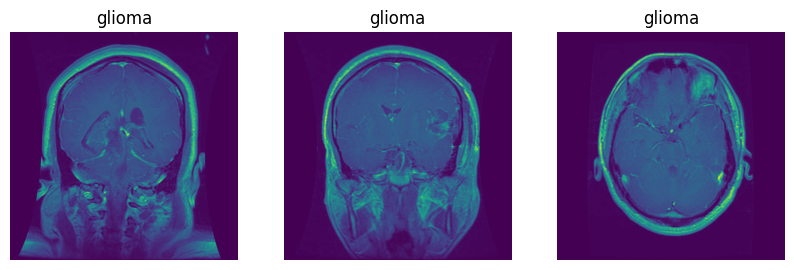

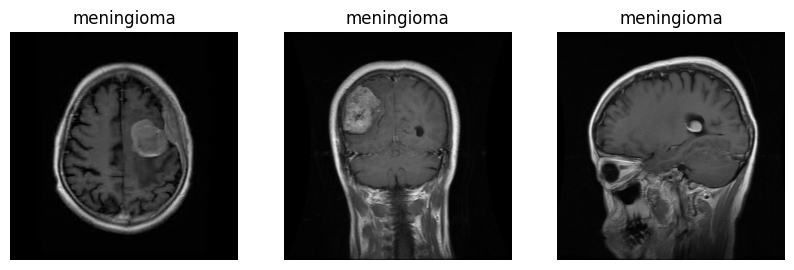

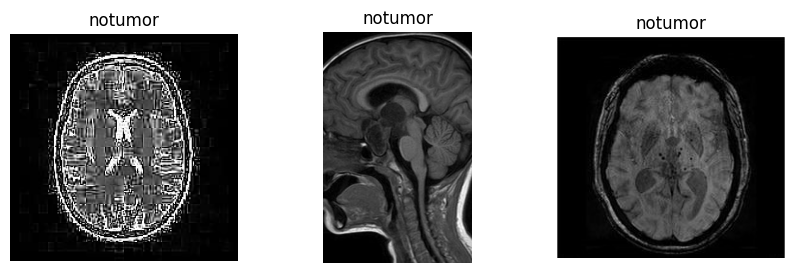

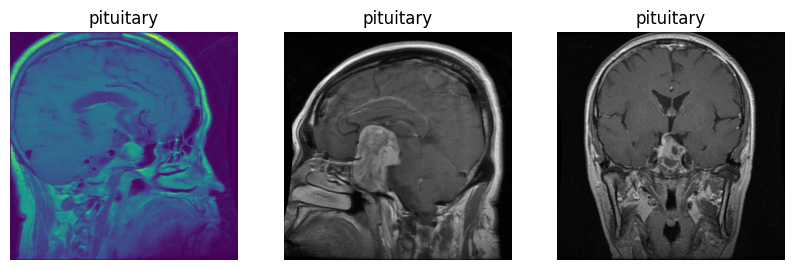

In [ ]:
import random

classes = training_dataset.classes

for class_name in classes:
  class_index = classes.index(class_name)
  class_images = [path for path, label in training_dataset.samples if label == class_index]

  random_image = random.sample(class_images, 3) #choose 3 random images from each class the list of class_images

  plt.figure(figsize=(10,3))
  for i, image_path in enumerate(random_image):
    img = Image.open(image_path)
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')





### Check image details

Class: ('/content/drive/MyDrive/Data/MRI_data/Training/glioma/Tr-glTr_0000.jpg', 0)
Image size: (512, 512)
Image mode: L
Image format: JPEG


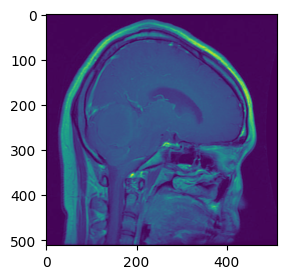

In [ ]:
image_path, label = random.choice(training_dataset.samples)
image = Image.open(image_path)

print (f"Class: {training_dataset.samples[label]}")
print (f"Image size: {image.size}")
print (f"Image mode: {image.mode}")
print (f"Image format: {image.format}")

plt.figure(figsize=(10,3))
plt.imshow(image)


### Image size distribution

Average width: 451.6
Average height: 453.9


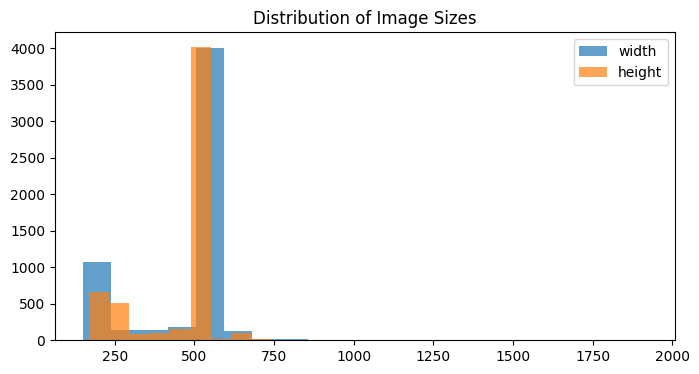

In [ ]:
sizes = [Image.open(path).size for path, _ in training_dataset.samples]
widths, heights = zip(*sizes)

print(f"Average width: {sum(widths)/len(widths):.1f}")
print(f"Average height: {sum(heights)/len(heights):.1f}")

plt.figure(figsize=(8,4))
plt.hist(widths, bins=20, alpha=0.7, label="width")
plt.hist(heights, bins=20, alpha=0.7, label="height")
plt.legend()
plt.title("Distribution of Image Sizes")
plt.show()

### Visualize class balance

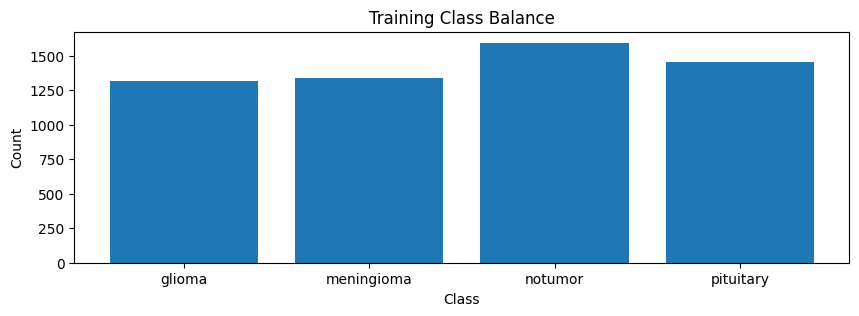

In [12]:
plt.figure(figsize=(10,3))
plt.bar(training_dataset.classes, train_count.values())
plt.title("Training Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

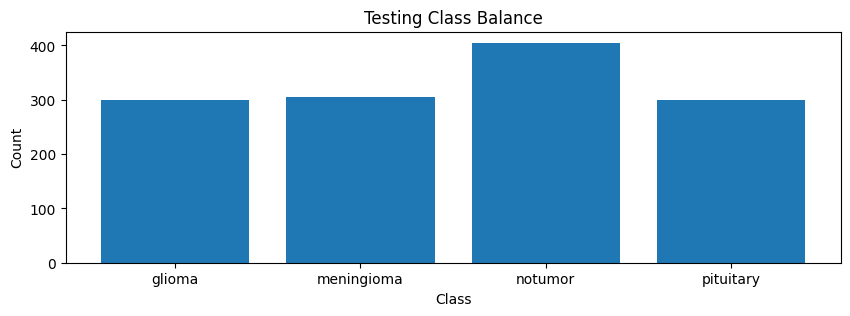

In [11]:
plt.figure(figsize=(10,3))
plt.bar(testing_dataset.classes, test_count.values())
plt.title("Testing Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Check corrupted images

In [10]:
from PIL import UnidentifiedImageError

corrupted = []
for path, _ in training_dataset.samples:
  try:
    img = Image.open(path).verify()
  except (UnidentifiedImageError , OSError):
    corrupted.append(path)

print (f"Number of corrupted images: {len(corrupted)}")

Number of corrupted images: 0
